In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
ibm = pd.read_csv("IBM_HR_Employee_Attrition.csv")
ibm.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
# Data types all look correct
ibm.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
ibm.shape

(1470, 35)

In [5]:
ibm.size

51450

In [6]:
# No null values
ibm.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

In [7]:
ibm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# Presented to look at all variables, should be ran idividually
ibm.describe().iloc[:, :8]
ibm.describe().iloc[:, 8:15]
ibm.describe().iloc[:, 15:21]
ibm.describe().iloc[:, 21:]

,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,2.000000,0.000000,2.000000
50%,3.000000,5.000000,3.000000,1.000000,3.000000
75%,3.000000,9.000000,7.000000,3.000000,7.000000
max,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# Loops through columns to check if all data is identical
for col in ibm.columns:
    if ibm[col].nunique() == 1:
        print(col)

EmployeeCount
Over18
StandardHours


In [10]:
# Delete columns as they are unessesary and do not affect the dataset
ibm = ibm.drop('Over18', axis=1)
ibm = ibm.drop('EmployeeCount', axis=1)
ibm = ibm.drop('StandardHours', axis=1)
ibm = ibm.drop('EmployeeNumber', axis=1)

# Dataset Analysis

In [11]:
# Set darkgrid style
sns.set_style('darkgrid')

# Added colour theme and made func that would spread the colours evenly across all 
                                # the bar charts, beginning with red ending with blue
colourTheme = ['#de0d0d', '#e0002b', '#dd0044', '#d2005d', '#bf0078', '#a20092', '#7500ab', '#0007bf']
def colourSpread(col, countOverride=False):
    columnCount = ibm[col].nunique()
    if countOverride is not False:
        columnCount = countOverride
    colours = []
    for variable in range(columnCount):
        colours.append(colourTheme[round((variable) / (columnCount - 1) * (len(colourTheme) - 1))])
    return colours

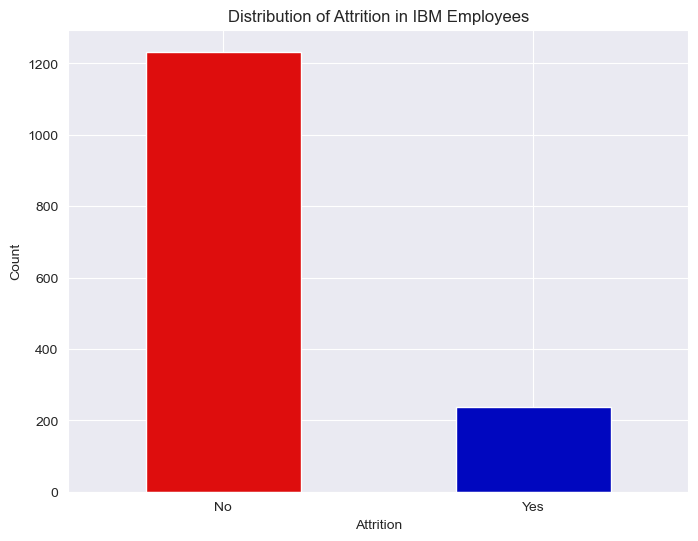

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
ibm['Attrition'].value_counts().sort_index().plot.bar(color = colourSpread('Attrition'), figsize=(8, 6))
plt.title('Distribution of Attrition in IBM Employees')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(rotation = 0)

plt.show()

ibm['Attrition'].value_counts()

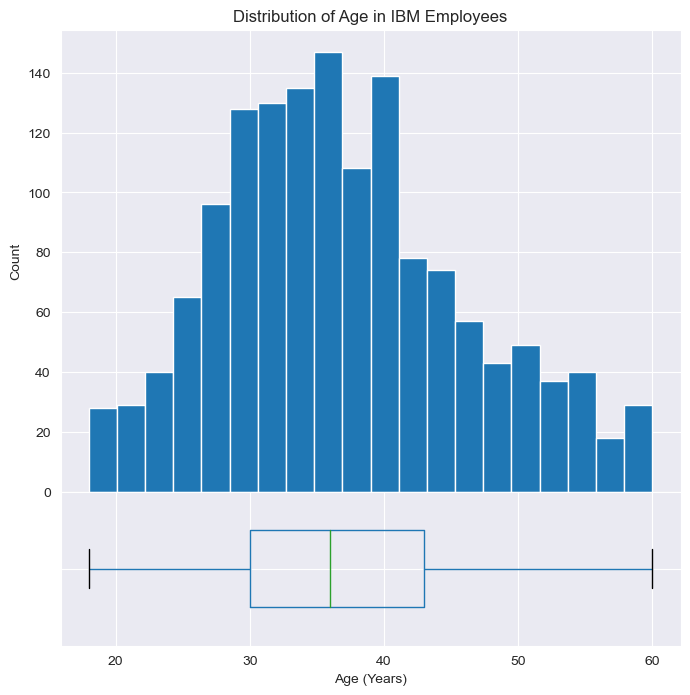

In [13]:
fig, (ax_hist, ax_boxplot) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.75, .25), 'hspace': 0}, figsize=(8, 8))

ibm.hist(column='Age', bins=20, ax=ax_hist)
ax_hist.set(ylabel='Count', title='Distribution of Age in IBM Employees')

ibm.boxplot(column='Age', ax=ax_boxplot, vert=False, widths = 0.5)
ax_boxplot.set(xlabel='Age (Years)')
ax_boxplot.tick_params(labelleft=False)

plt.show()

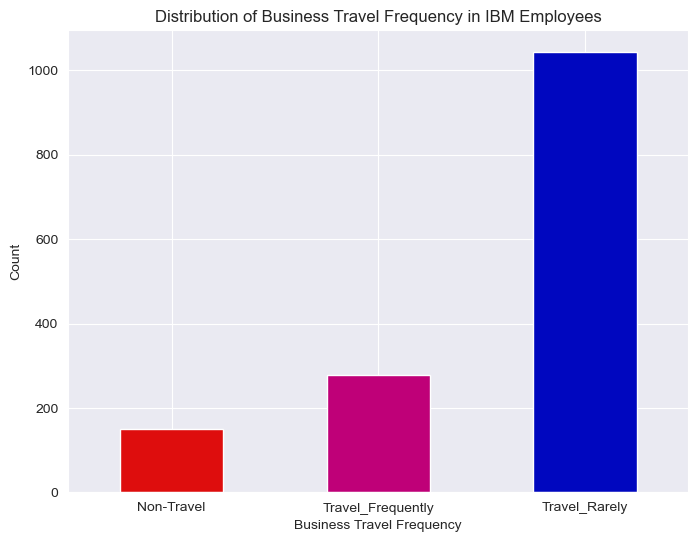

In [14]:
ibm['BusinessTravel'].value_counts().sort_index().plot.bar(color = colourSpread('BusinessTravel'), figsize=(8, 6))
plt.title('Distribution of Business Travel Frequency in IBM Employees')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Count')
plt.xticks(rotation= 0)

ibm['BusinessTravel'].value_counts()

plt.show()

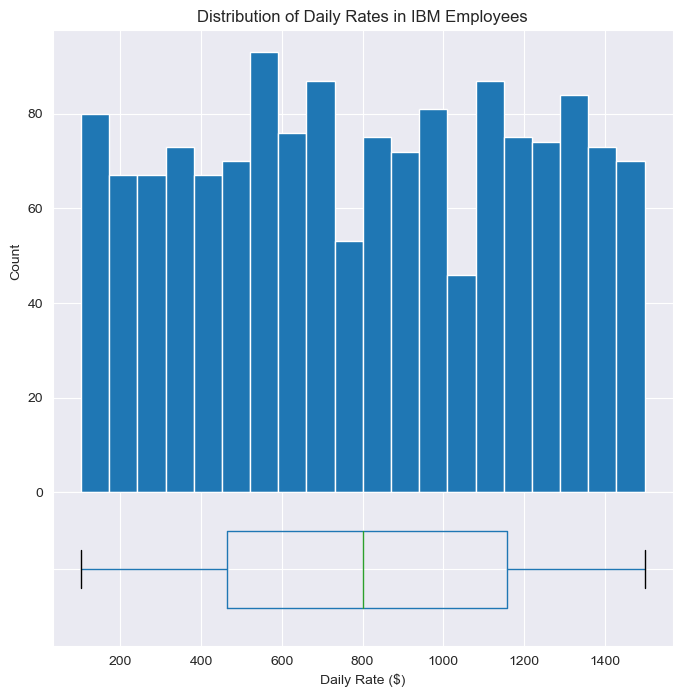

In [15]:
# Assume currency is dollar as not stated in original dataset, but US based company

fig, (ax_hist, ax_boxplot) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.75, .25), 'hspace': 0}, figsize=(8, 8))

ibm.hist(column='DailyRate', bins=20, ax=ax_hist)
ax_hist.set(ylabel='Count', title='Distribution of Daily Rates in IBM Employees')

ibm.boxplot(column='DailyRate', ax=ax_boxplot, vert=False, widths = 0.5)
ax_boxplot.set(xlabel='Daily Rate ($)')
ax_boxplot.tick_params(labelleft=False)

plt.show()

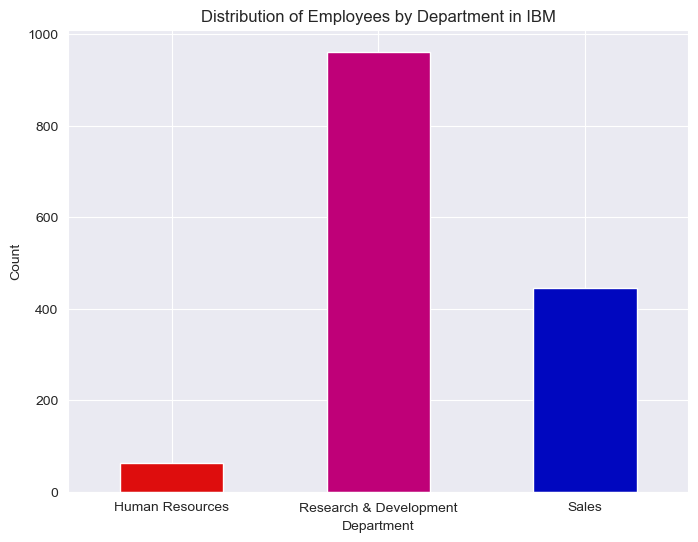

In [16]:
ibm['Department'].value_counts().sort_index().plot.bar(color = colourSpread('Department'), figsize=(8, 6))
plt.title('Distribution of Employees by Department in IBM')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation= 0)

ibm['Department'].value_counts()

plt.show()

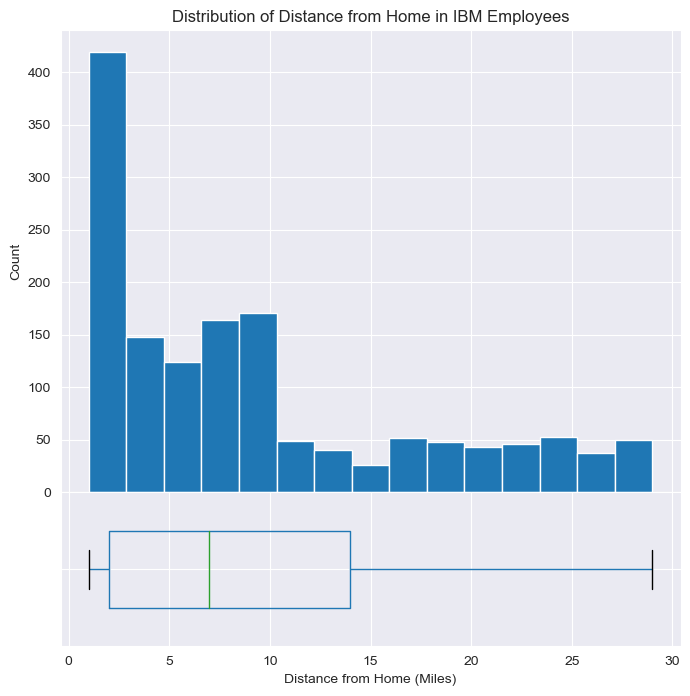

In [17]:
# Miles assumed as not stated

fig, (ax_hist, ax_boxplot) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.75, .25), 'hspace': 0}, figsize=(8, 8))

ibm.hist(column='DistanceFromHome', bins=15, ax=ax_hist)
ax_hist.set(ylabel='Count', title='Distribution of Distance from Home in IBM Employees')

ibm.boxplot(column='DistanceFromHome', ax=ax_boxplot, vert=False, widths = 0.5)
ax_boxplot.set(xlabel='Distance from Home (Miles)')
ax_boxplot.tick_params(labelleft=False)

plt.show()

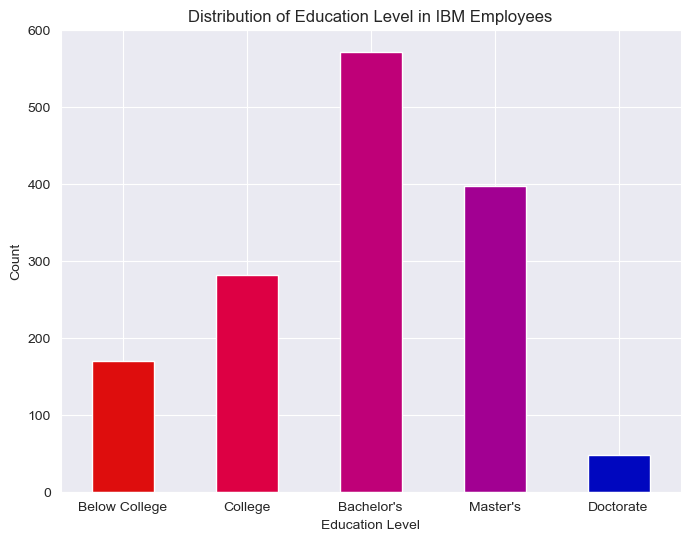

In [18]:
"""
1 - Below College (which includes education up to high school level)
2 - College
3 - Bachelor's Degree
4 - Master's Degree
5 - Doctorate
"""

ibm['Education'].value_counts().sort_index().plot.bar(color = colourSpread('Education'), figsize=(8, 6))
plt.title('Distribution of Education Level in IBM Employees')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(range(5), ['Below College','College','Bachelor\'s','Master\'s','Doctorate'], rotation = 0)

ibm['Education'].value_counts()

plt.show()

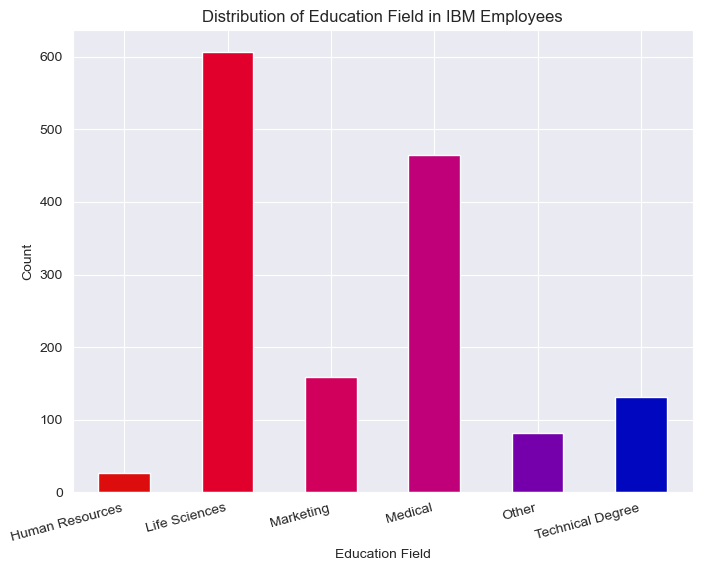

In [19]:
ibm['EducationField'].value_counts().sort_index().plot.bar(color = colourSpread('EducationField'), figsize=(8, 6))
plt.title('Distribution of Education Field in IBM Employees')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.xticks(rotation = 15, ha = 'right')

ibm['EducationField'].value_counts()

plt.show()

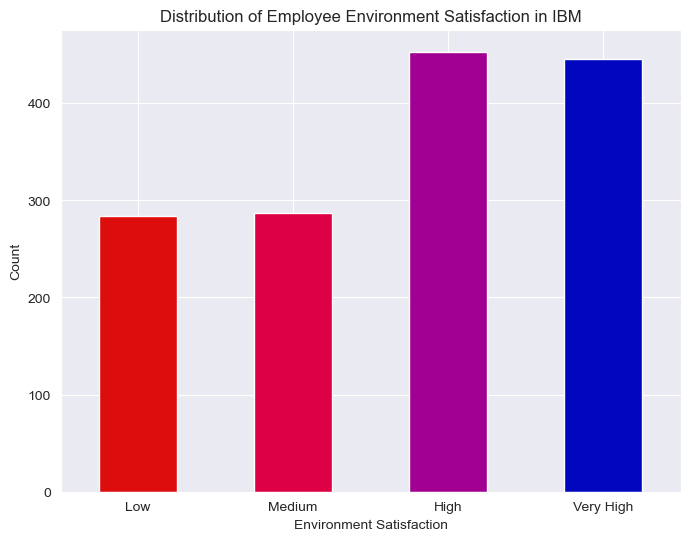

In [20]:
"""
1 - Low
2 - Medium
3 - High
4 - Very High
"""

ibm['EnvironmentSatisfaction'].value_counts().sort_index().plot.bar(color = colourSpread('EnvironmentSatisfaction'), figsize=(8, 6))
plt.title('Distribution of Employee Environment Satisfaction in IBM')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.xticks(range(4), ['Low', 'Medium', 'High', 'Very High'], rotation = 0)

ibm['EnvironmentSatisfaction'].value_counts()

plt.show()

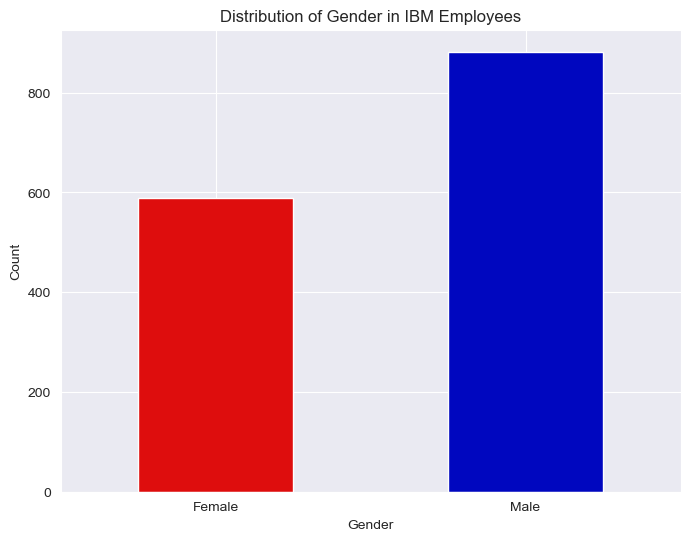

In [21]:
ibm['Gender'].value_counts().sort_index().plot.bar(color = colourSpread('Gender'), figsize=(8, 6))
plt.title('Distribution of Gender in IBM Employees')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation = 0)

ibm['Gender'].value_counts()

plt.show()

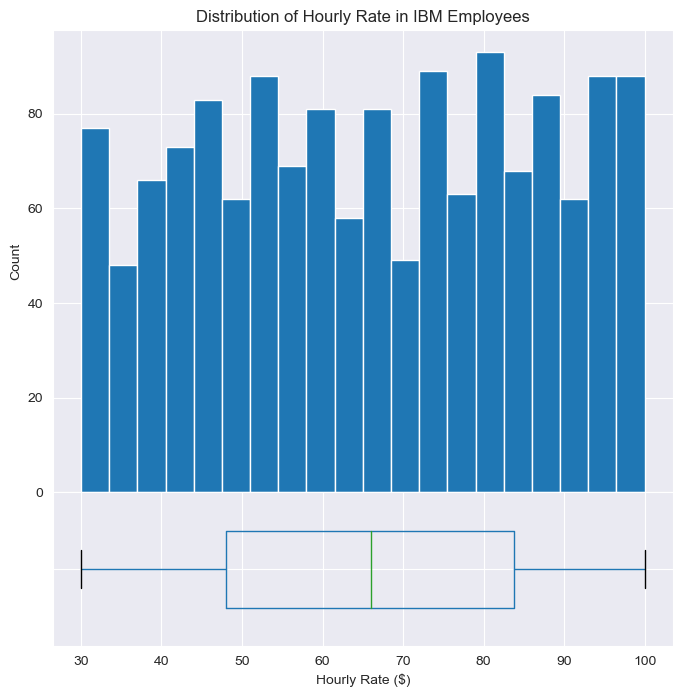

In [22]:
fig, (ax_hist, ax_boxplot) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.75, .25), 'hspace': 0}, figsize=(8, 8))

ibm.hist(column='HourlyRate', bins=20, ax=ax_hist)
ax_hist.set(ylabel='Count', title='Distribution of Hourly Rate in IBM Employees')

ibm.boxplot(column='HourlyRate', ax=ax_boxplot, vert=False, widths = 0.5)
ax_boxplot.set(xlabel='Hourly Rate ($)')
ax_boxplot.tick_params(labelleft=False)

plt.show()

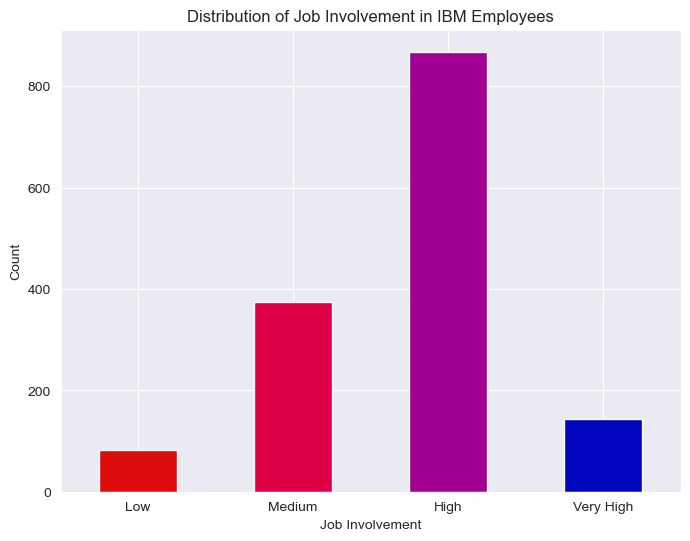

In [23]:
"""
1 - Low
2 - Medium
3 - High
4 - Very High
"""

ibm['JobInvolvement'].value_counts().sort_index().plot.bar(color = colourSpread('JobInvolvement'), figsize=(8, 6))
plt.title('Distribution of Job Involvement in IBM Employees')
plt.xlabel('Job Involvement')
plt.ylabel('Count')
plt.xticks(range(4), ['Low', 'Medium', 'High', 'Very High'], rotation = 0)

ibm['JobInvolvement'].value_counts()

plt.show()

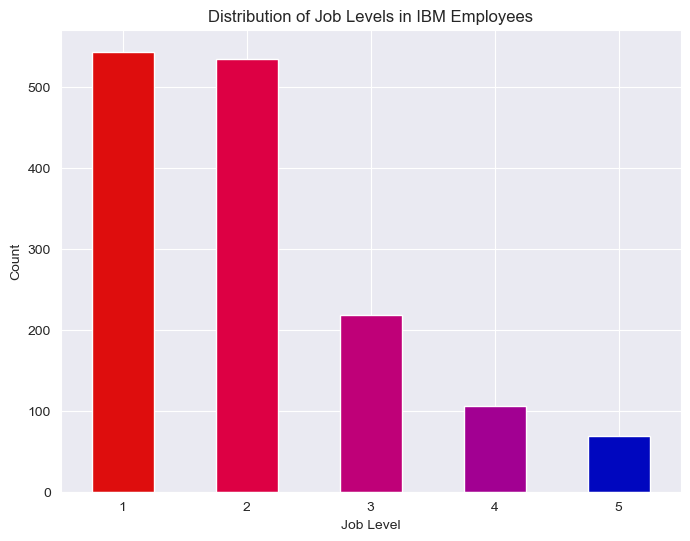

In [24]:
ibm['JobLevel'].value_counts().sort_index().plot.bar(color = colourSpread('JobLevel'), figsize=(8, 6))
plt.title('Distribution of Job Levels in IBM Employees')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.xticks(rotation = 0)

ibm['JobLevel'].value_counts()

plt.show()

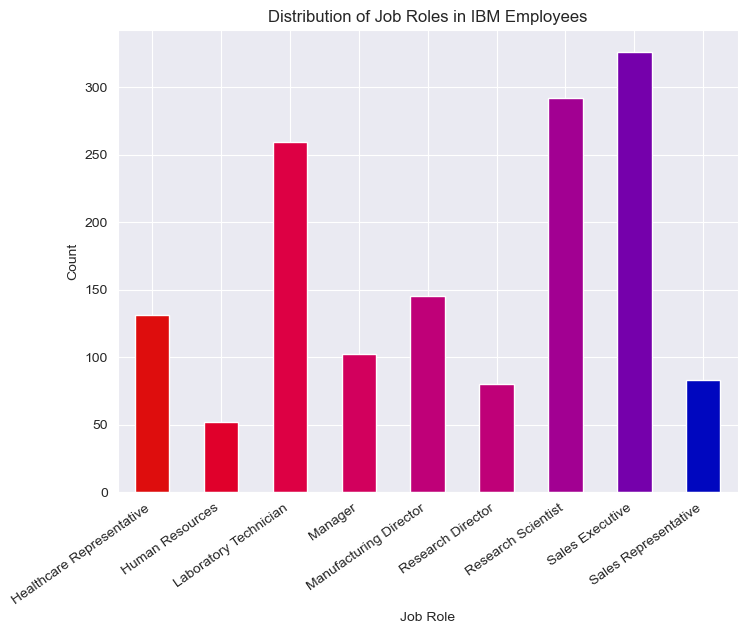

In [25]:
ibm['JobRole'].value_counts().sort_index().plot.bar(color = colourSpread('JobRole'), figsize=(8, 6))
plt.title('Distribution of Job Roles in IBM Employees')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation = 35, ha='right')

ibm['JobRole'].value_counts()

plt.show()

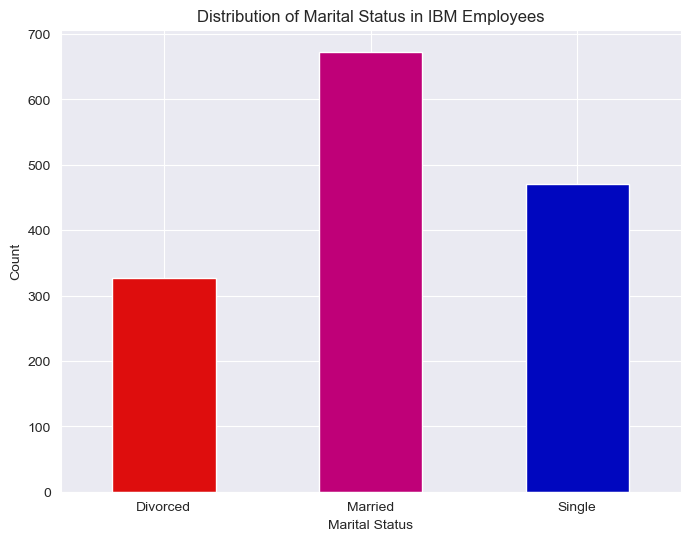

In [26]:
ibm['MaritalStatus'].value_counts().sort_index().plot.bar(color = colourSpread('MaritalStatus'), figsize=(8, 6))
plt.title('Distribution of Marital Status in IBM Employees')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation = 0)
ibm['MaritalStatus'].value_counts()

plt.show()

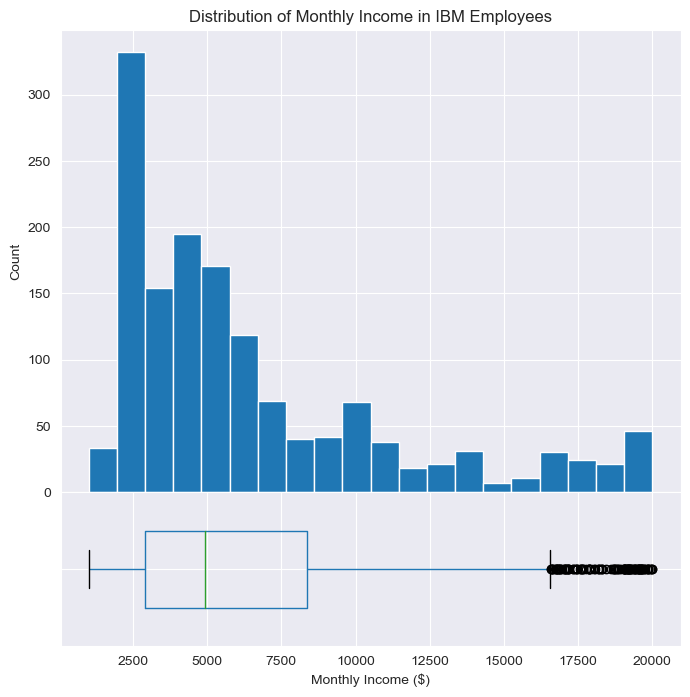

In [27]:
fig, (ax_hist, ax_boxplot) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.75, .25), 'hspace': 0}, figsize=(8, 8))

ibm.hist(column='MonthlyIncome', bins=20, ax=ax_hist)
ax_hist.set(ylabel='Count', title='Distribution of Monthly Income in IBM Employees')

ibm.boxplot(column='MonthlyIncome', ax=ax_boxplot, vert=False, widths = 0.5)
ax_boxplot.set(xlabel='Monthly Income ($)')
ax_boxplot.tick_params(labelleft=False)

plt.show()

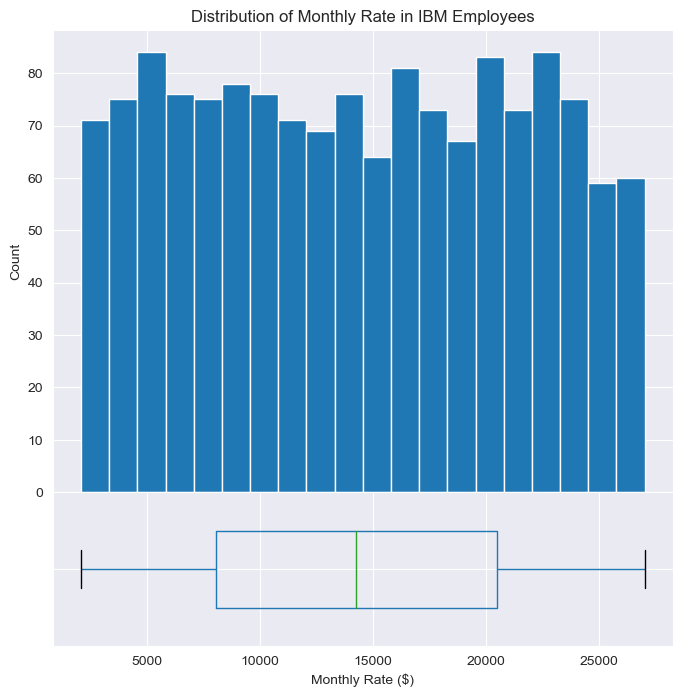

In [28]:
fig, (ax_hist, ax_boxplot) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.75, .25), 'hspace': 0}, figsize=(8, 8))

ibm.hist(column='MonthlyRate', bins=20, ax=ax_hist)
ax_hist.set(ylabel='Count', title='Distribution of Monthly Rate in IBM Employees')

ibm.boxplot(column='MonthlyRate', ax=ax_boxplot, vert=False, widths = 0.5)
ax_boxplot.set(xlabel='Monthly Rate ($)')
ax_boxplot.tick_params(labelleft=False)

plt.show()

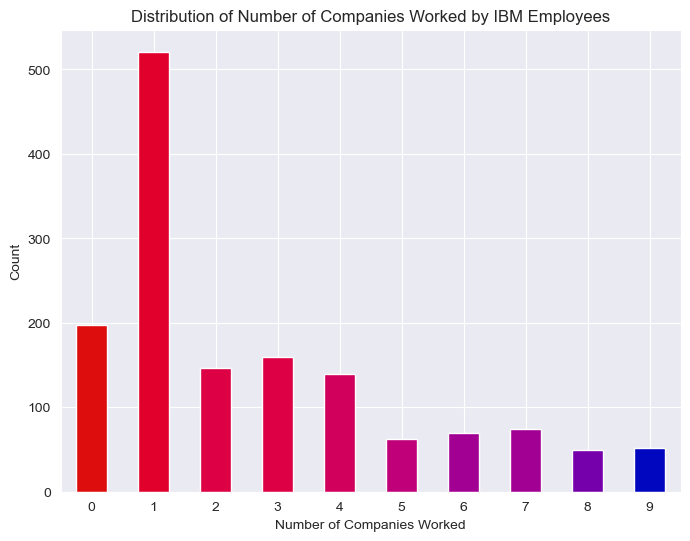

In [29]:
ibm['NumCompaniesWorked'].value_counts().sort_index().plot.bar(color = colourSpread('NumCompaniesWorked'), figsize=(8, 6))
plt.title('Distribution of Number of Companies Worked by IBM Employees')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Count')
plt.xticks(rotation = 0)

ibm['NumCompaniesWorked'].value_counts()

plt.show()

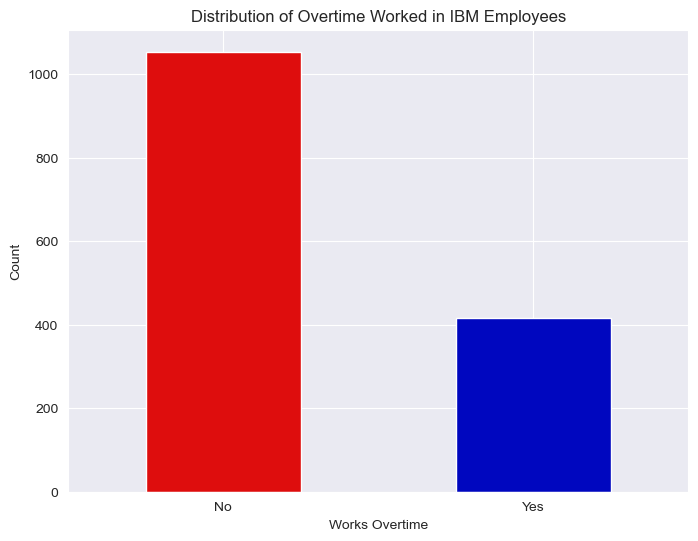

In [30]:
ibm['OverTime'].value_counts().sort_index().plot.bar(color = colourSpread('OverTime'), figsize=(8, 6))
plt.title('Distribution of Overtime Worked in IBM Employees')
plt.xlabel('Works Overtime')
plt.ylabel('Count')
plt.xticks(rotation = 0)

ibm['OverTime'].value_counts()

plt.show()

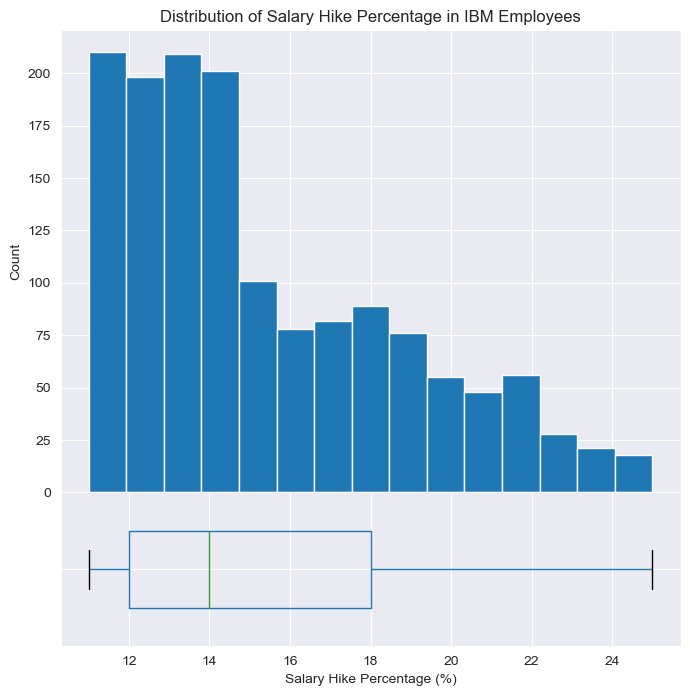

In [31]:
fig, (ax_hist, ax_boxplot) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.75, .25), 'hspace': 0}, figsize=(8, 8))

ibm.hist(column='PercentSalaryHike', bins=15, ax=ax_hist)
ax_hist.set(ylabel='Count', title='Distribution of Salary Hike Percentage in IBM Employees')

ibm.boxplot(column='PercentSalaryHike', ax=ax_boxplot, vert=False, widths = 0.5)
ax_boxplot.set(xlabel='Salary Hike Percentage (%)')
ax_boxplot.tick_params(labelleft=False)

plt.show()

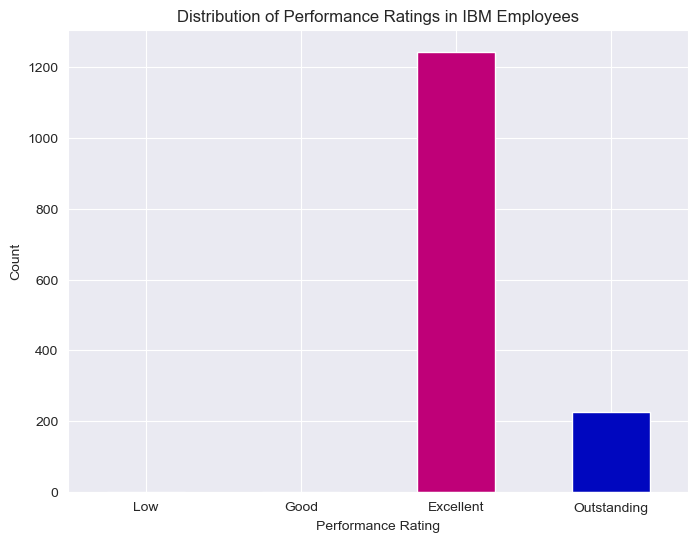

In [32]:
"""
1 - Low
2 - Good
3 - Excellent
4 - Outstanding

"""

# Used reidex so that the empty Low/Good bars are included to better represent the data
RatingCounts = ibm['PerformanceRating'].value_counts().sort_index()
RatingCounts = RatingCounts.reindex([1,2,3,4])

RatingCounts.plot.bar(color = ['#bf0078', '#0007bf'], figsize=(8, 6))
plt.title('Distribution of Performance Ratings in IBM Employees')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.xticks(range(4), ['Low', 'Good', 'Excellent', 'Outstanding'], rotation = 0)

ibm['PerformanceRating'].value_counts()

plt.show()

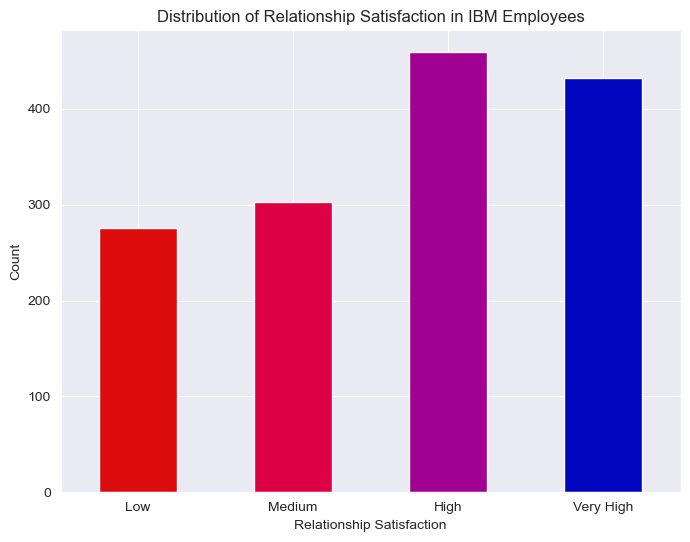

In [33]:
"""
1 - Low
2 - Medium
3 - High
4 - Very High
"""

ibm['RelationshipSatisfaction'].value_counts().sort_index().plot.bar(color = colourSpread('RelationshipSatisfaction'), figsize=(8, 6))
plt.title('Distribution of Relationship Satisfaction in IBM Employees')
plt.xlabel('Relationship Satisfaction')
plt.ylabel('Count')
plt.xticks(range(4), ['Low', 'Medium', 'High', 'Very High'], rotation = 0)

ibm['RelationshipSatisfaction'].value_counts()

plt.show()

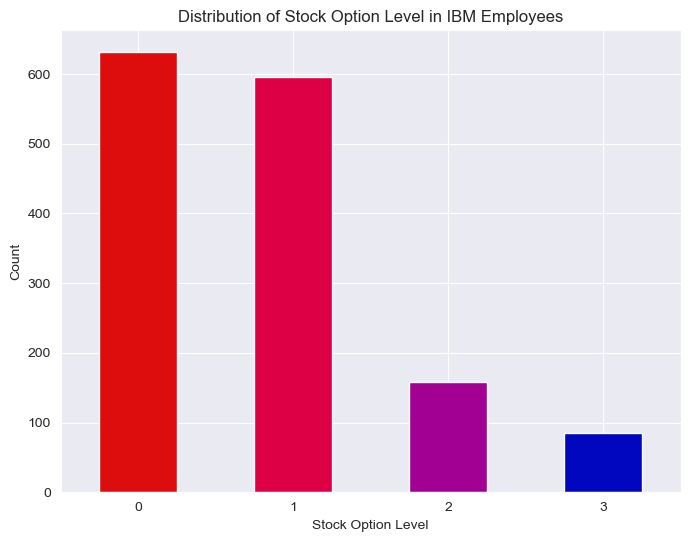

In [34]:
ibm['StockOptionLevel'].value_counts().sort_index().plot.bar(color = colourSpread('StockOptionLevel'), figsize=(8, 6))
plt.title('Distribution of Stock Option Level in IBM Employees')
plt.xlabel('Stock Option Level')
plt.ylabel('Count')
plt.xticks(rotation = 0)

ibm['StockOptionLevel'].value_counts()

plt.show()

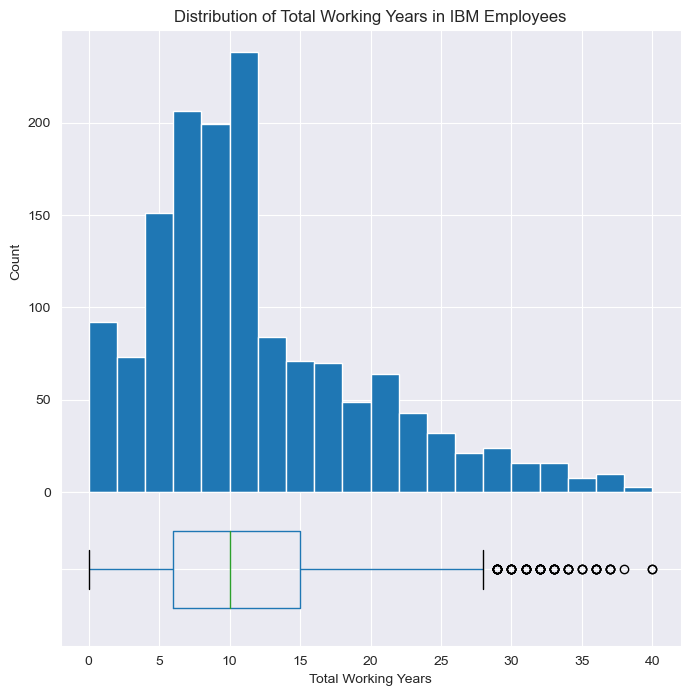

In [35]:
fig, (ax_hist, ax_boxplot) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.75, .25), 'hspace': 0}, figsize=(8, 8))

ibm.hist(column='TotalWorkingYears', bins=20, ax=ax_hist)
ax_hist.set(ylabel='Count', title='Distribution of Total Working Years in IBM Employees')

ibm.boxplot(column='TotalWorkingYears', ax=ax_boxplot, vert=False, widths = 0.5)
ax_boxplot.set(xlabel='Total Working Years')
ax_boxplot.tick_params(labelleft=False)

plt.show()

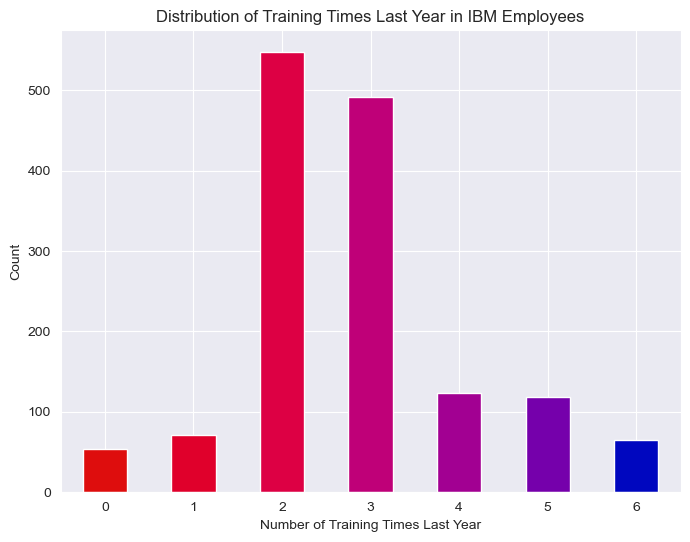

In [36]:
ibm['TrainingTimesLastYear'].value_counts().sort_index().plot.bar(color = colourSpread('TrainingTimesLastYear'), figsize=(8, 6))
plt.title('Distribution of Training Times Last Year in IBM Employees')
plt.xlabel('Number of Training Times Last Year')
plt.ylabel('Count')
plt.xticks(rotation = 0)

ibm['TrainingTimesLastYear'].value_counts()

plt.show()

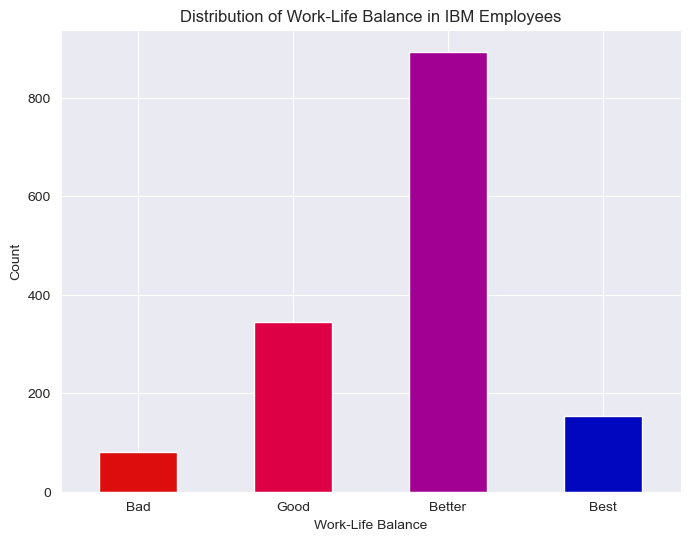

In [37]:
"""
1 - Bad
2 - Good
3 - Better
4 - Best
"""

ibm['WorkLifeBalance'].value_counts().sort_index().plot.bar(color = colourSpread('WorkLifeBalance'), figsize=(8, 6))
plt.title('Distribution of Work-Life Balance in IBM Employees')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.xticks(range(4), ['Bad', 'Good', 'Better', 'Best'], rotation = 0)

ibm['WorkLifeBalance'].value_counts()

plt.show()

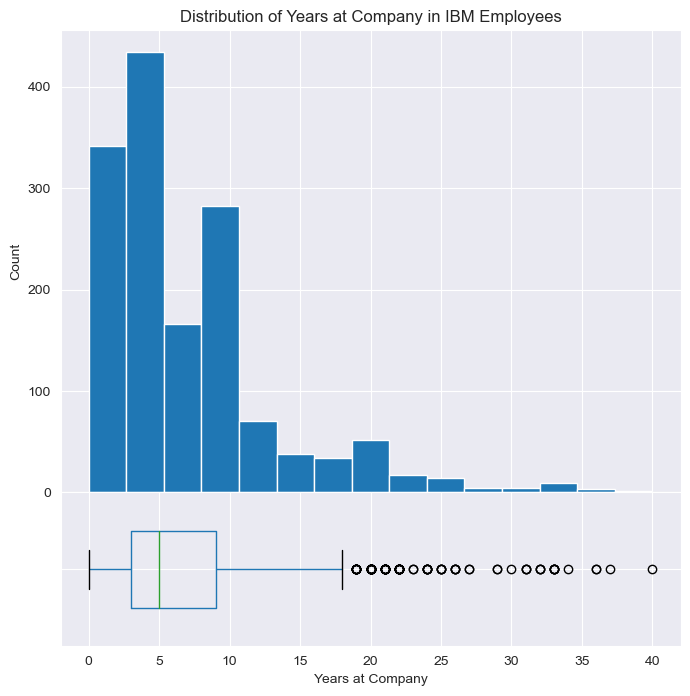

In [38]:
fig, (ax_hist, ax_boxplot) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.75, .25), 'hspace': 0}, figsize=(8, 8))

ibm.hist(column='YearsAtCompany', bins=15, ax=ax_hist)
ax_hist.set(ylabel='Count', title='Distribution of Years at Company in IBM Employees')

ibm.boxplot(column='YearsAtCompany', ax=ax_boxplot, vert=False, widths = 0.5)
ax_boxplot.set(xlabel='Years at Company')
ax_boxplot.tick_params(labelleft=False)

plt.show()

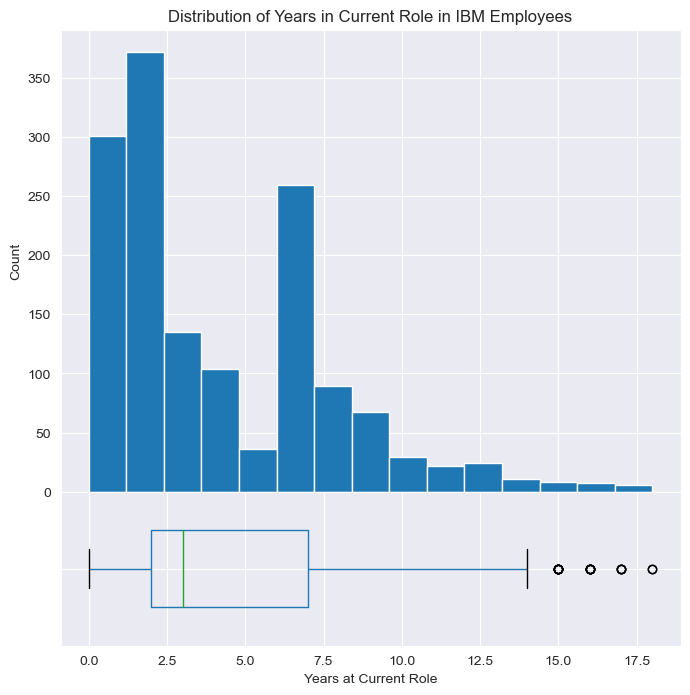

In [39]:
fig, (ax_hist, ax_boxplot) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.75, .25), 'hspace': 0}, figsize=(8, 8))

ibm.hist(column='YearsInCurrentRole', bins=15, ax=ax_hist)
ax_hist.set(ylabel='Count', title='Distribution of Years in Current Role in IBM Employees')

ibm.boxplot(column='YearsInCurrentRole', ax=ax_boxplot, vert=False, widths = 0.5)
ax_boxplot.set(xlabel='Years at Current Role')
ax_boxplot.tick_params(labelleft=False)

plt.show()

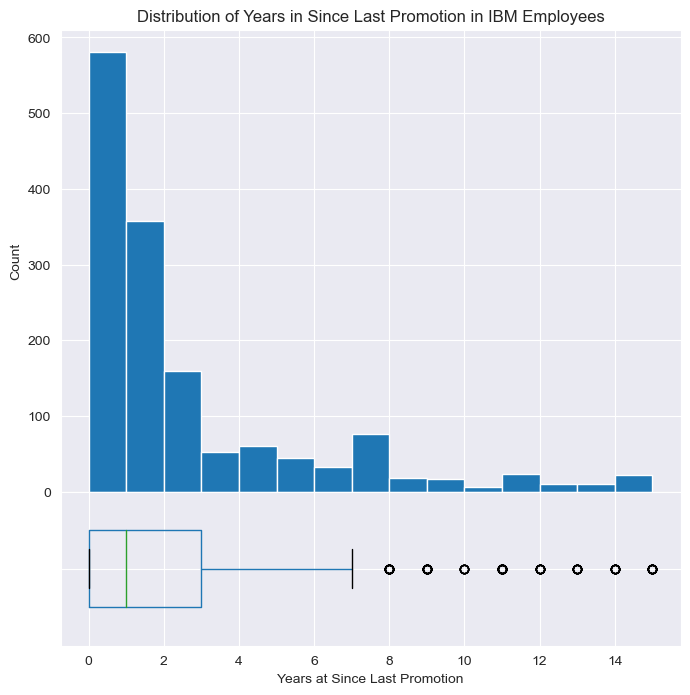

In [40]:
fig, (ax_hist, ax_boxplot) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.75, .25), 'hspace': 0}, figsize=(8, 8))

ibm.hist(column='YearsSinceLastPromotion', bins=15, ax=ax_hist)
ax_hist.set(ylabel='Count', title='Distribution of Years in Since Last Promotion in IBM Employees')

ibm.boxplot(column='YearsSinceLastPromotion', ax=ax_boxplot, vert=False, widths = 0.5)
ax_boxplot.set(xlabel='Years at Since Last Promotion')
ax_boxplot.tick_params(labelleft=False)

plt.show()

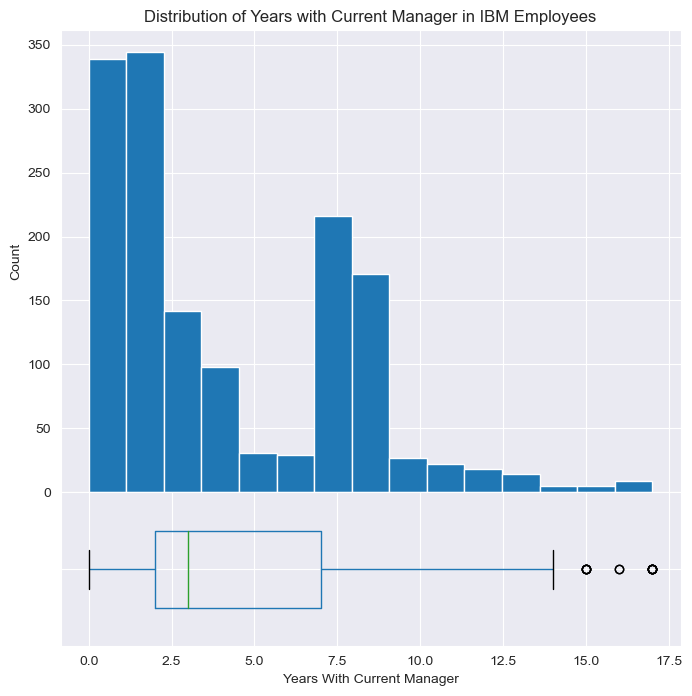

In [41]:
fig, (ax_hist, ax_boxplot) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.75, .25), 'hspace': 0}, figsize=(8, 8))

ibm.hist(column='YearsWithCurrManager', bins=15, ax=ax_hist)
ax_hist.set(ylabel='Count', title='Distribution of Years with Current Manager in IBM Employees')

ibm.boxplot(column='YearsWithCurrManager', ax=ax_boxplot, vert=False, widths = 0.5)
ax_boxplot.set(xlabel='Years With Current Manager')
ax_boxplot.tick_params(labelleft=False)

plt.show()

# Correlation Analysis

In [42]:
# Temp converted categorical to continuous variables, 
        # so that categorigal variable can be included in the correlation matrix
cat_vars = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
            'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for var in cat_vars:
    ibm[var] = ibm[var].astype('category').cat.codes

In [43]:
# Split the data into training and testing sets
X = ibm.drop('Attrition', axis=1)
y = ibm['Attrition']
# Chose 5 because favoite number :)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [44]:
ibmTrain = X_train
ibmTrain.insert(0, 'Attrition', y_train)
ibmTrain

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1084,0,34,2,971,2,1,3,5,4,1,...,3,4,0,10,3,3,10,9,8,6
954,0,42,0,495,1,2,1,1,3,1,...,3,4,0,21,3,2,20,8,2,10
996,0,27,2,205,2,10,3,2,4,0,...,3,4,0,6,3,3,6,2,4,4
1005,0,29,2,332,0,17,3,4,2,1,...,3,1,0,10,3,2,10,9,0,9
1041,0,28,2,866,2,5,3,3,4,1,...,3,4,0,6,4,3,5,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,0,35,2,1395,1,9,4,3,2,1,...,3,2,0,10,5,3,10,7,0,8
1142,0,45,2,1015,1,5,5,3,3,0,...,3,1,0,10,3,3,10,7,1,4
998,0,26,2,683,1,2,1,3,1,1,...,3,4,0,5,2,3,4,3,1,1
206,0,22,2,1136,1,5,3,1,4,1,...,3,1,1,4,2,2,4,2,2,2


In [45]:
corr_matrix = ibmTrain.corr()
corr_matrix

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.144507,0.003083,-0.073873,0.079599,0.072931,-0.023685,0.017081,-0.100245,0.032105,...,0.000736,-0.041946,-0.137738,-0.170124,-0.034153,-0.074692,-0.140407,-0.163931,-0.044336,-0.154958
Age,-0.144507,1.000000,0.023420,-0.000088,-0.022906,-0.009648,0.188716,-0.044274,0.008557,-0.042107,...,0.012742,0.061723,0.039221,0.659021,-0.038942,-0.016800,0.298053,0.195143,0.204614,0.191981
BusinessTravel,0.003083,0.023420,1.000000,-0.012521,0.001689,-0.017317,0.008447,0.015492,0.006252,-0.027970,...,-0.004827,-0.030769,-0.023685,0.033963,0.006406,-0.018687,-0.021819,-0.020555,-0.013523,-0.032143
DailyRate,-0.073873,-0.000088,-0.012521,1.000000,0.043319,-0.025428,-0.019431,0.055208,0.039542,-0.031396,...,-0.001455,0.008331,0.047309,0.005611,-0.002705,-0.041494,-0.034303,0.009947,-0.048091,-0.026417
Department,0.079599,-0.022906,0.001689,0.043319,1.000000,0.044024,0.007740,-0.004330,-0.025284,-0.036499,...,-0.040362,-0.020724,-0.015217,-0.014824,0.033714,0.031616,0.021838,0.063143,0.050623,0.042937
DistanceFromHome,0.072931,-0.009648,-0.017317,-0.025428,0.044024,1.000000,0.019315,-0.007094,-0.026831,0.010671,...,0.007047,0.019933,0.036433,0.001032,-0.030003,-0.016972,-0.019997,0.008513,-0.003901,-0.008196
Education,-0.023685,0.188716,0.008447,-0.019431,0.007740,0.019315,1.000000,-0.058227,-0.011598,-0.007305,...,-0.046533,-0.009546,0.026819,0.125702,-0.046502,0.028455,0.040536,0.058638,0.023439,0.057275
EducationField,0.017081,-0.044274,0.015492,0.055208,-0.004330,-0.007094,-0.058227,1.000000,0.038958,0.014554,...,-0.004793,0.010211,-0.000188,-0.027221,0.041091,0.059282,-0.032340,-0.015901,-0.000700,-0.011973
EnvironmentSatisfaction,-0.100245,0.008557,0.006252,0.039542,-0.025284,-0.026831,-0.011598,0.038958,1.000000,-0.030339,...,-0.013993,0.015938,0.014394,-0.017391,-0.012375,0.050179,-0.004099,0.031348,0.027366,0.002257
Gender,0.032105,-0.042107,-0.027970,-0.031396,-0.036499,0.010671,-0.007305,0.014554,-0.030339,1.000000,...,-0.050350,0.023136,-0.010162,-0.058560,-0.041116,-0.002511,-0.030954,-0.039707,-0.034256,-0.029950


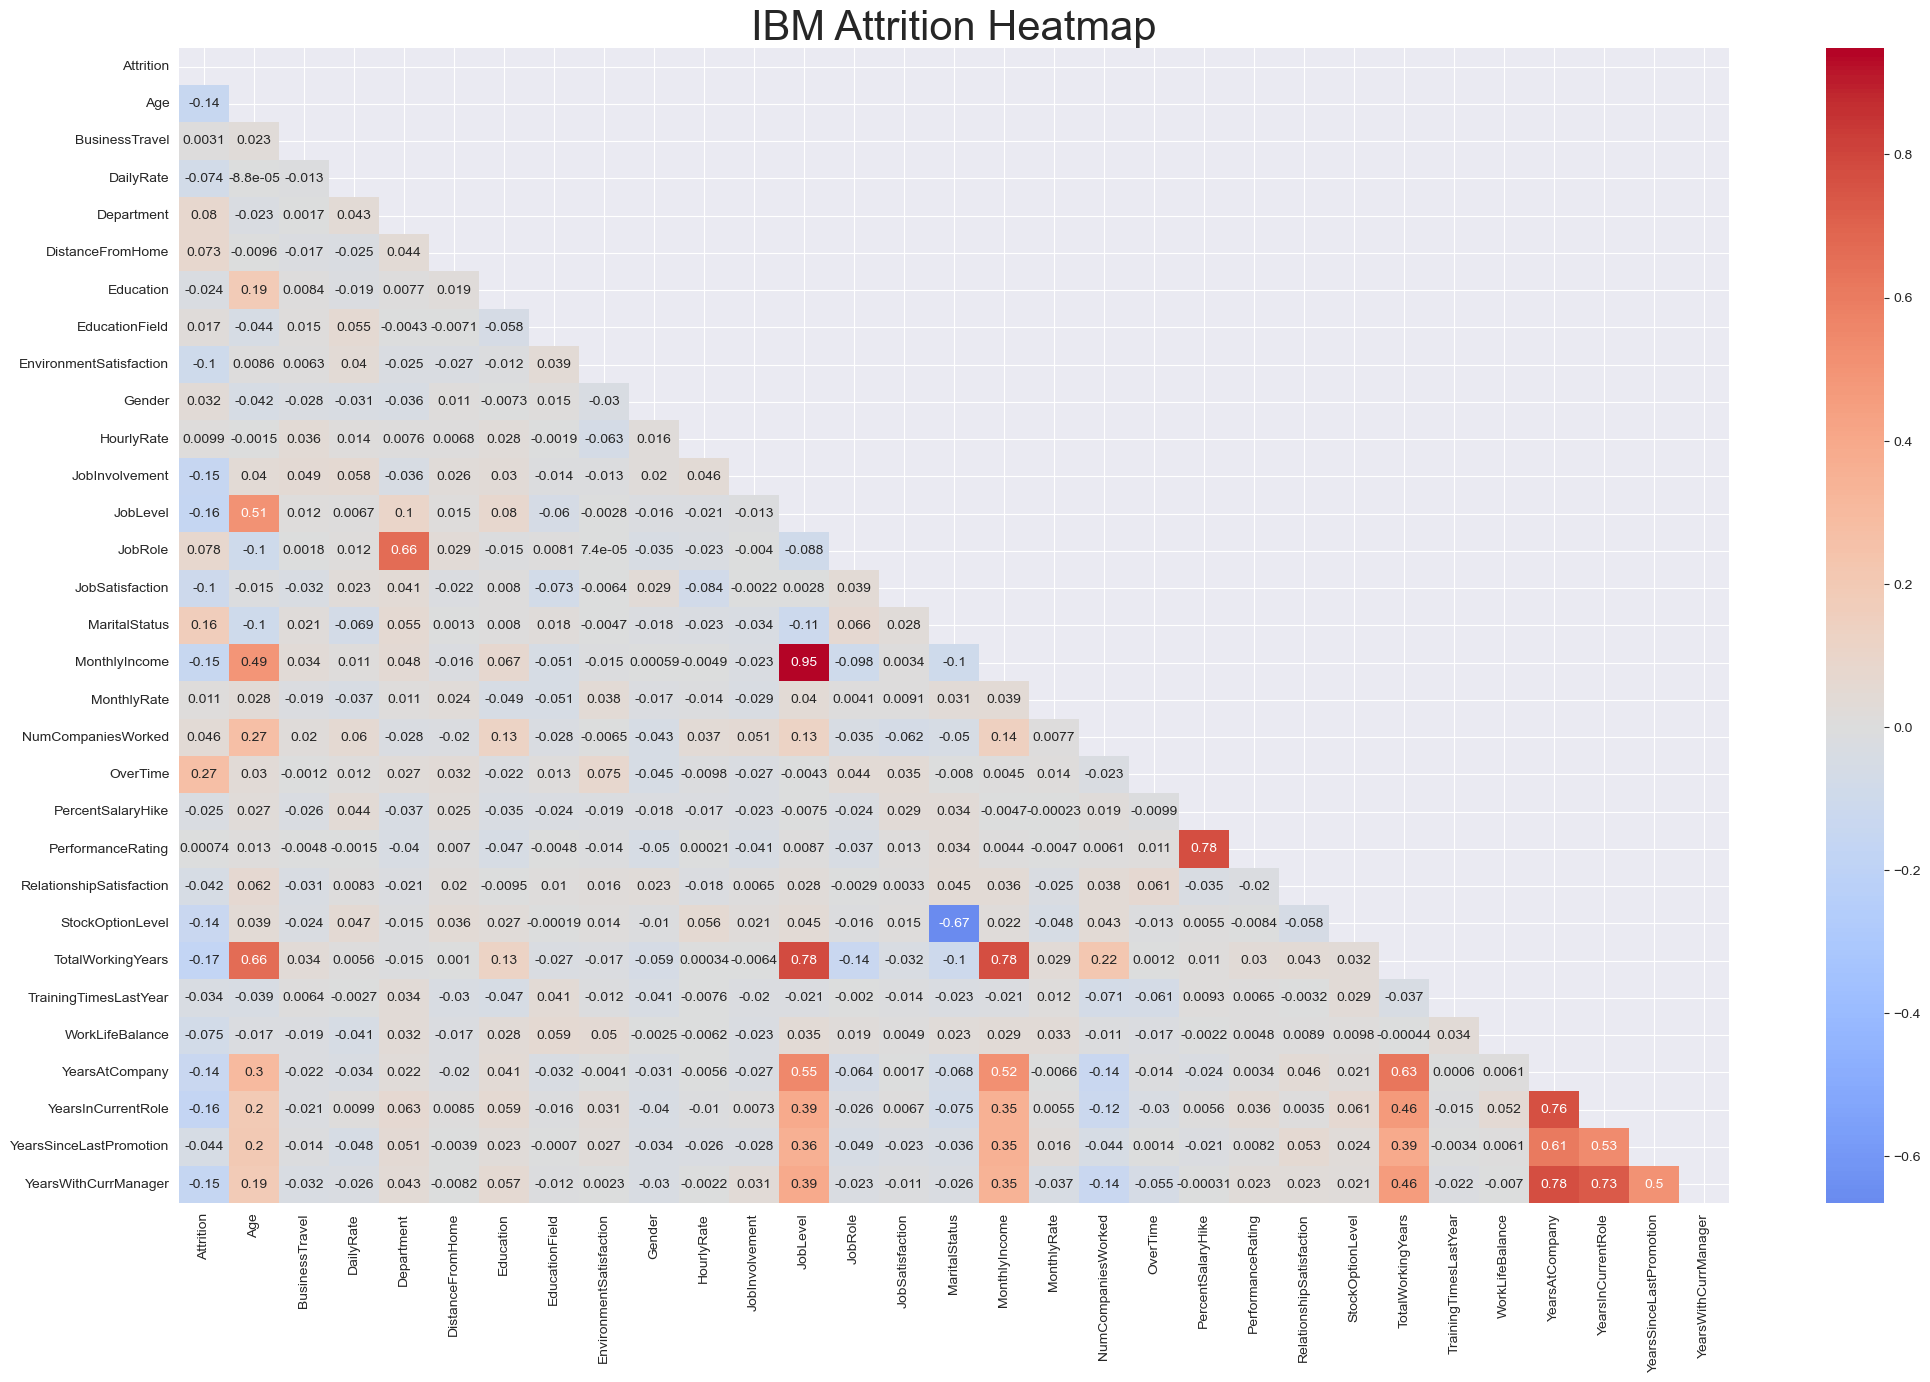

In [46]:
plt.figure(figsize=(25,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, mask = np.triu(np.ones_like(corr_matrix)))
plt.title('IBM Attrition Heatmap', size=30)

plt.show()

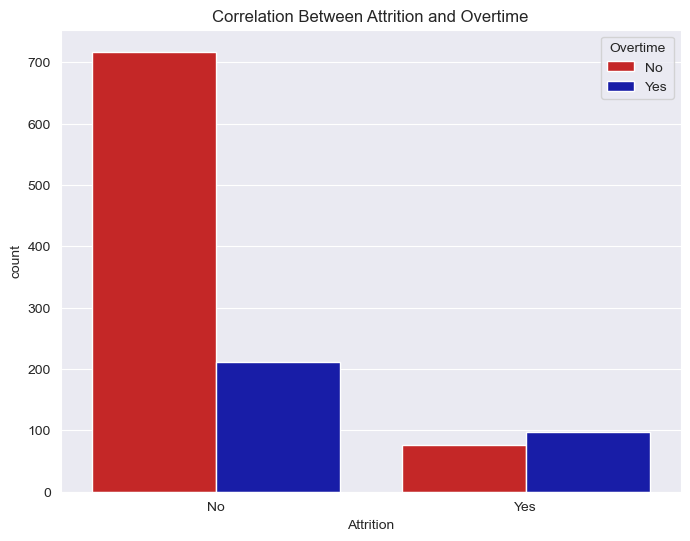

In [47]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=ibmTrain, x='Attrition', hue='OverTime', palette=sns.color_palette(colourSpread('Attrition')))
ax.set_title('Correlation Between Attrition and Overtime')
plt.xticks(range(2), ['No', 'Yes'], rotation = 0)
ax.legend(title='Overtime', labels=['No', 'Yes'])

plt.show()

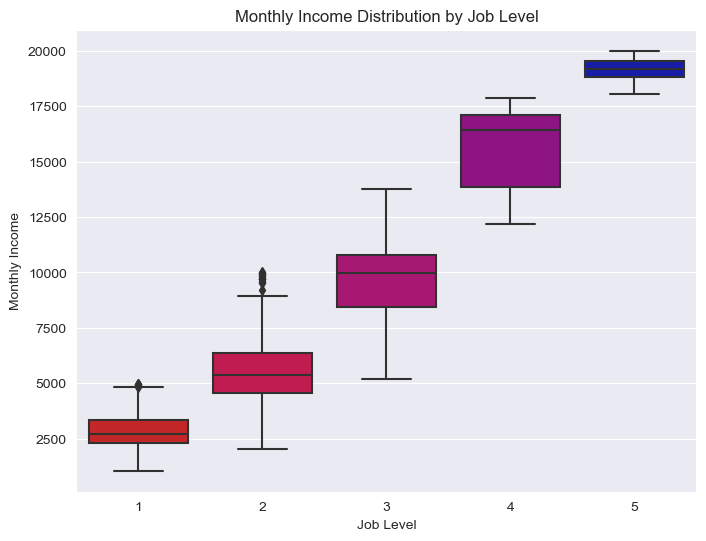

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(data=ibmTrain, x='JobLevel', y='MonthlyIncome', palette=sns.color_palette(colourSpread('JobLevel')))
plt.title('Monthly Income Distribution by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')

plt.show()

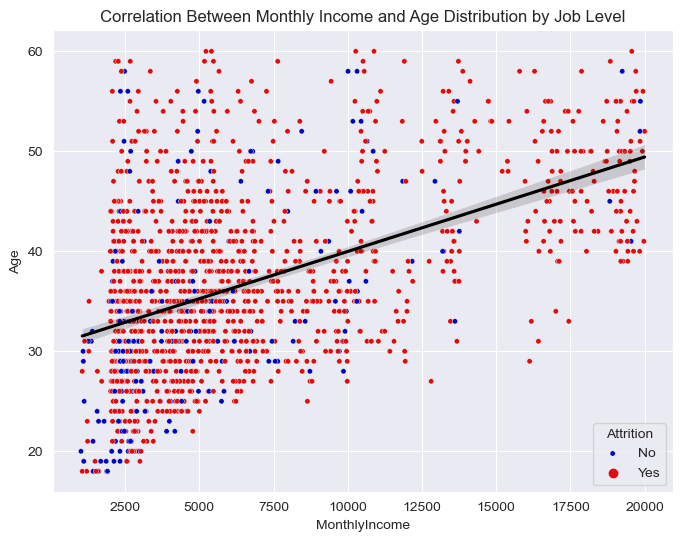

In [49]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=ibm, x='MonthlyIncome', y='Age', hue='Attrition', 
                     palette=sns.color_palette(colourSpread('Attrition')), s=15)
plt.title('Correlation Between Monthly Income and Age Distribution by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')
ax.legend(title='Attrition', labels=['No', 'Yes'])

sns.regplot(data=ibmTrain, x='MonthlyIncome', y='Age', ax=ax, scatter=False, color='black')

plt.show()

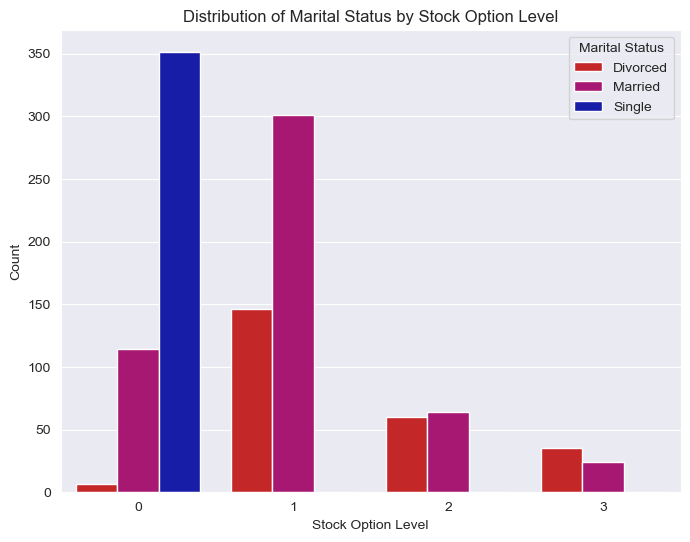

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(data=ibmTrain, x="StockOptionLevel", hue="MaritalStatus", 
              palette=sns.color_palette(colourSpread('MaritalStatus')))
plt.legend(title="Marital Status", labels=['Divorced', 'Married', 'Single'])
plt.xlabel("Stock Option Level")
plt.ylabel("Count")
plt.title("Distribution of Marital Status by Stock Option Level")

plt.show()

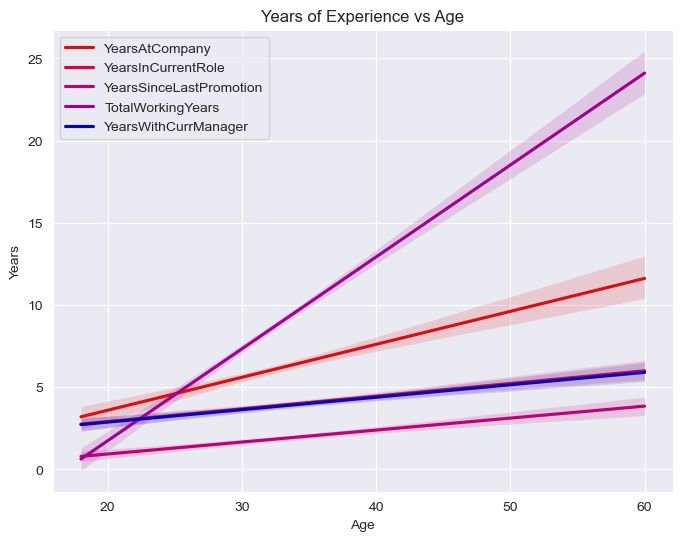

In [51]:
plt.figure(figsize=(8,6))
colours = colourSpread('Attrition',5)

for i,j in enumerate(['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','TotalWorkingYears','YearsWithCurrManager']):
    c = colours[i]
    sns.regplot(data=ibmTrain, x='Age', y=j, scatter=False, color=c, label=j)
plt.xlabel("Age")
plt.ylabel("Years")
plt.title("Years of Experience vs Age")
plt.legend()

plt.show()

In [52]:
corr_to_attrition = ibmTrain.corr()['Attrition'].sort_values(key=abs, ascending=False)
print(corr_to_attrition)

Attrition                   1.000000
OverTime                    0.272631
TotalWorkingYears          -0.170124
YearsInCurrentRole         -0.163931
MaritalStatus               0.162443
JobLevel                   -0.158767
YearsWithCurrManager       -0.154958
JobInvolvement             -0.151918
MonthlyIncome              -0.146848
Age                        -0.144507
YearsAtCompany             -0.140407
StockOptionLevel           -0.137738
JobSatisfaction            -0.104990
EnvironmentSatisfaction    -0.100245
Department                  0.079599
JobRole                     0.078391
WorkLifeBalance            -0.074692
DailyRate                  -0.073873
DistanceFromHome            0.072931
NumCompaniesWorked          0.046129
YearsSinceLastPromotion    -0.044336
RelationshipSatisfaction   -0.041946
TrainingTimesLastYear      -0.034153
Gender                      0.032105
PercentSalaryHike          -0.024569
Education                  -0.023685
EducationField              0.017081
M

In [54]:
X_train = X_train.drop('Education', axis=1)
X_train = X_train.drop('StockOptionLevel', axis=1)
X_train = X_train.drop('JobLevel', axis=1)
X_train = X_train.drop('PerformanceRating', axis=1)
X_train = X_train.drop('BusinessTravel', axis=1)

KeyError: "['Education'] not found in axis"

In [55]:
X_train = X_train.drop('PerformanceRating', axis=1)
X_train = X_train.drop('BusinessTravel', axis=1)

In [56]:
ibm['JobDepartment'] = ibm['JobRole'].astype(str) + "_" + ibm['Department'].astype(str)
ibm['JobDepartment'] = ibm['JobDepartment'].astype('category').cat.codes

In [57]:
ibm['JobDepartment'] = ibm['JobDepartment'].astype('category').cat.codes

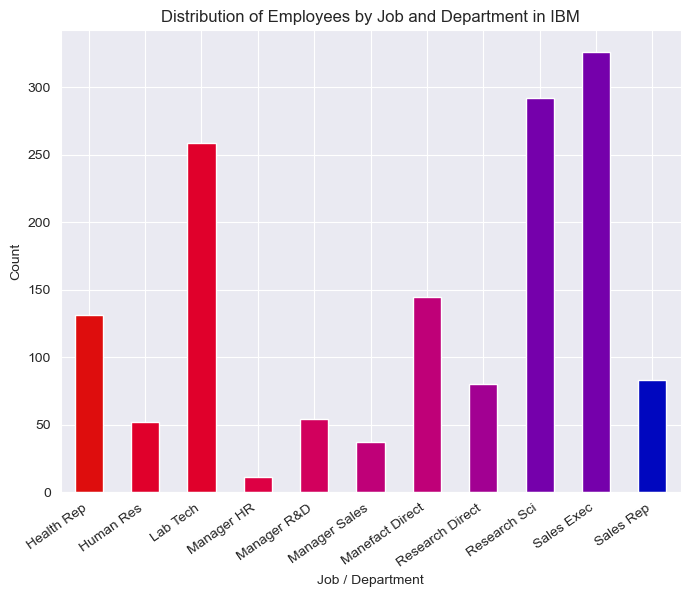

In [58]:
ibm['JobDepartment'].value_counts().sort_index().plot.bar(color = colourSpread('JobDepartment'), figsize=(8, 6))
plt.title('Distribution of Employees by Job and Department in IBM')
plt.xlabel('Job / Department')
plt.ylabel('Count')
plt.xticks(range(11), ['Health Rep', 'Human Res', 'Lab Tech',
                       'Manager HR', 'Manager R&D', 'Manager Sales',
                       'Manefact Direct', 'Research Direct', 'Research Sci',
                       'Sales Exec', 'Sales Rep'], rotation = 35, ha='right')

ibm['JobDepartment'].value_counts()

plt.show()

In [59]:
X_train = X_train.drop('JobRole', axis=1)
X_train = X_train.drop('Department', axis=1)

In [60]:
ibmTrain = X_train
corr_matrix = ibmTrain.corr()
corr_matrix

,Attrition,Age,DailyRate,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.144507,-0.073873,0.072931,0.017081,-0.100245,0.032105,0.009937,-0.151918,-0.104990,...,0.272631,-0.024569,-0.041946,-0.170124,-0.034153,-0.074692,-0.140407,-0.163931,-0.044336,-0.154958
Age,-0.144507,1.000000,-0.000088,-0.009648,-0.044274,0.008557,-0.042107,-0.001474,0.039734,-0.015072,...,0.029539,0.027038,0.061723,0.659021,-0.038942,-0.016800,0.298053,0.195143,0.204614,0.191981
DailyRate,-0.073873,-0.000088,1.000000,-0.025428,0.055208,0.039542,-0.031396,0.013945,0.057785,0.022732,...,0.011913,0.044260,0.008331,0.005611,-0.002705,-0.041494,-0.034303,0.009947,-0.048091,-0.026417
DistanceFromHome,0.072931,-0.009648,-0.025428,1.000000,-0.007094,-0.026831,0.010671,0.006793,0.026234,-0.022040,...,0.031690,0.024837,0.019933,0.001032,-0.030003,-0.016972,-0.019997,0.008513,-0.003901,-0.008196
EducationField,0.017081,-0.044274,0.055208,-0.007094,1.000000,0.038958,0.014554,-0.001933,-0.014396,-0.073424,...,0.013374,-0.024391,0.010211,-0.027221,0.041091,0.059282,-0.032340,-0.015901,-0.000700,-0.011973
EnvironmentSatisfaction,-0.100245,0.008557,0.039542,-0.026831,0.038958,1.000000,-0.030339,-0.063449,-0.012760,-0.006446,...,0.075462,-0.018992,0.015938,-0.017391,-0.012375,0.050179,-0.004099,0.031348,0.027366,0.002257
Gender,0.032105,-0.042107,-0.031396,0.010671,0.014554,-0.030339,1.000000,0.016405,0.019946,0.029330,...,-0.044998,-0.017887,0.023136,-0.058560,-0.041116,-0.002511,-0.030954,-0.039707,-0.034256,-0.029950
HourlyRate,0.009937,-0.001474,0.013945,0.006793,-0.001933,-0.063449,0.016405,1.000000,0.046431,-0.084193,...,-0.009768,-0.016784,-0.017985,0.000337,-0.007565,-0.006192,-0.005596,-0.010051,-0.026207,-0.002158
JobInvolvement,-0.151918,0.039734,0.057785,0.026234,-0.014396,-0.012760,0.019946,0.046431,1.000000,-0.002219,...,-0.026830,-0.022667,0.006473,-0.006442,-0.019875,-0.022808,-0.026886,0.007304,-0.028310,0.031284
JobSatisfaction,-0.104990,-0.015072,0.022732,-0.022040,-0.073424,-0.006446,0.029330,-0.084193,-0.002219,1.000000,...,0.034945,0.028730,0.003268,-0.031920,-0.013793,0.004908,0.001738,0.006742,-0.022714,-0.010789


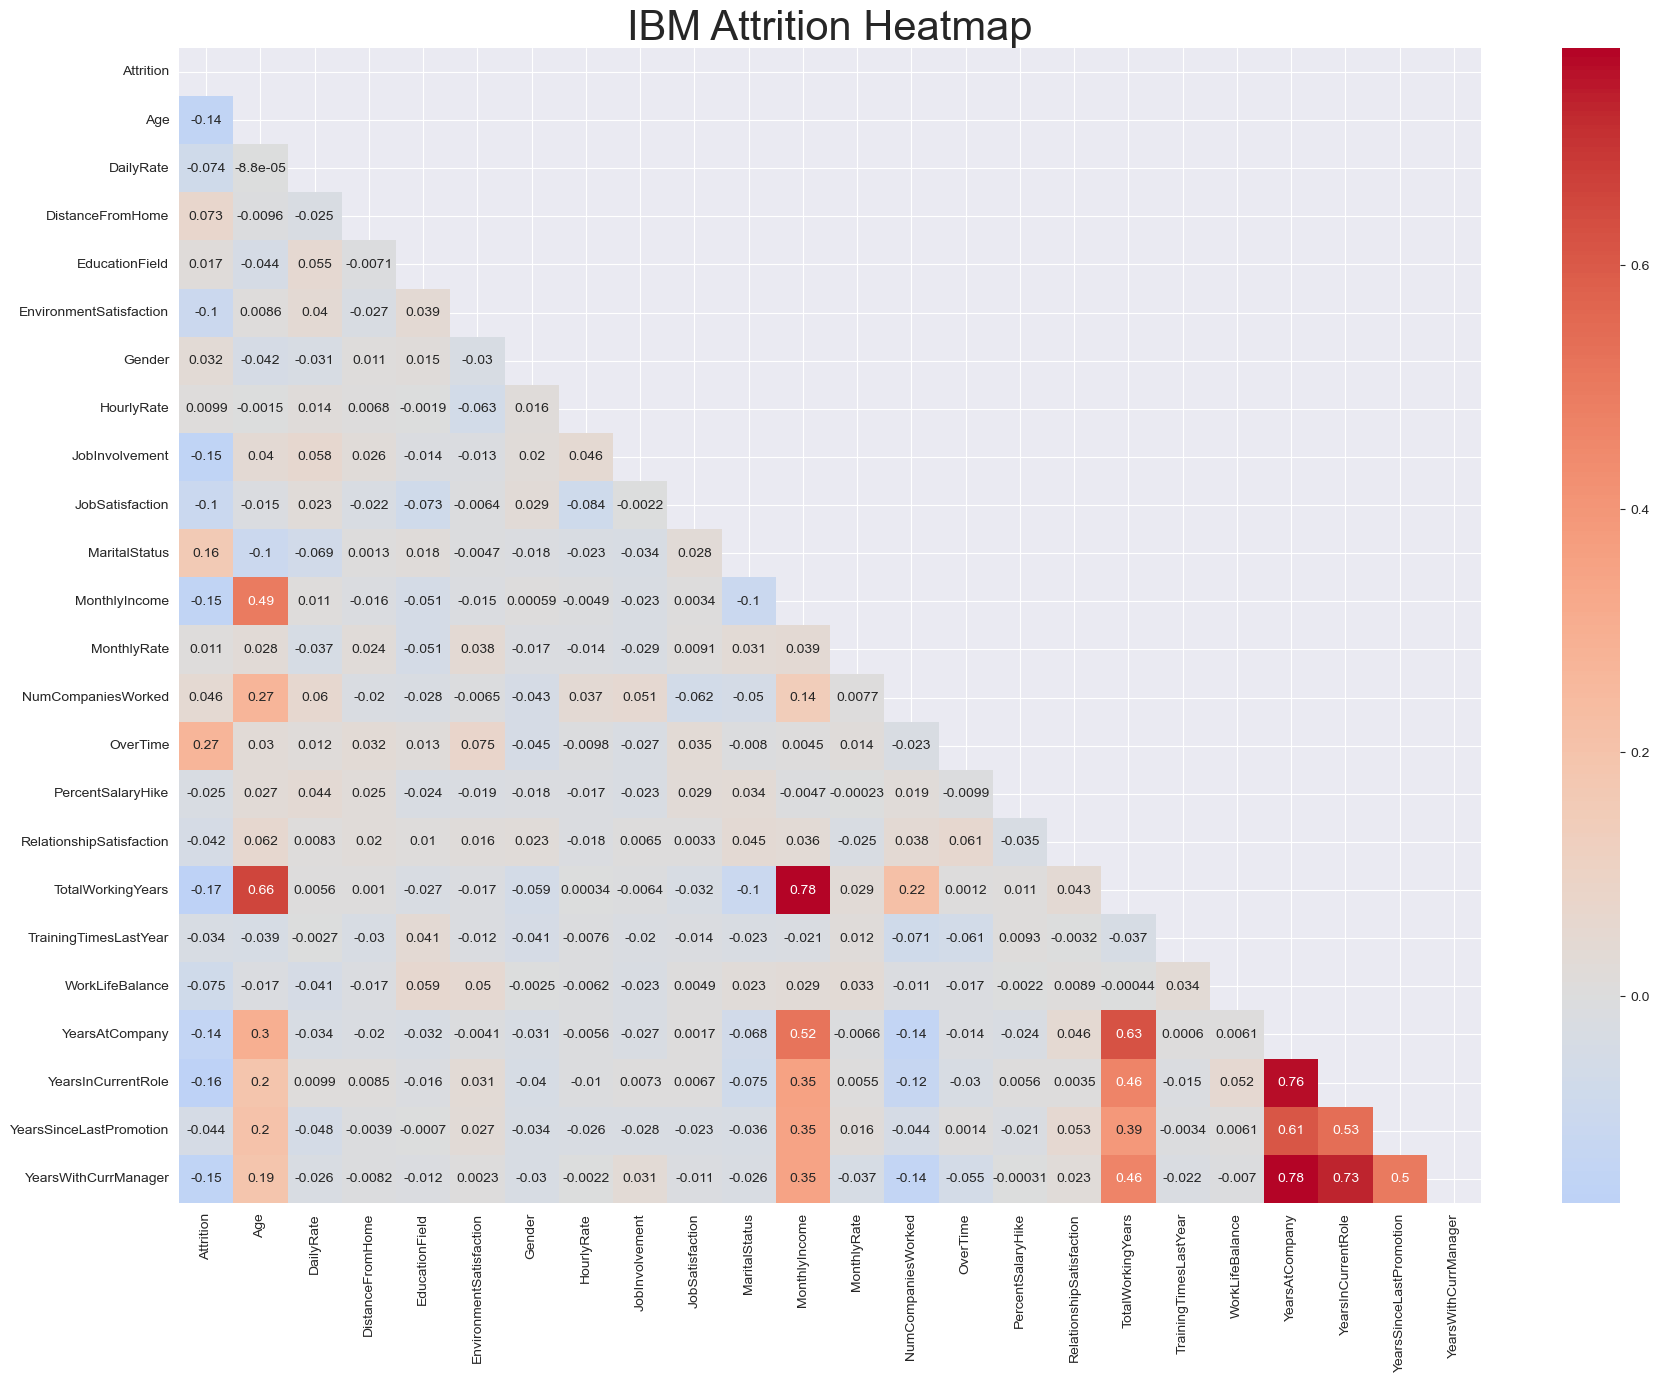

In [61]:
plt.figure(figsize=(21,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, mask = np.triu(np.ones_like(corr_matrix)))
plt.title('IBM Attrition Heatmap', size=30)

plt.show()

In [62]:
corr_to_attrition = ibmTrain.corr()['Attrition'].sort_values(key=abs, ascending=False)
print(corr_to_attrition)

Attrition                   1.000000
OverTime                    0.272631
TotalWorkingYears          -0.170124
YearsInCurrentRole         -0.163931
MaritalStatus               0.162443
YearsWithCurrManager       -0.154958
JobInvolvement             -0.151918
MonthlyIncome              -0.146848
Age                        -0.144507
YearsAtCompany             -0.140407
JobSatisfaction            -0.104990
EnvironmentSatisfaction    -0.100245
WorkLifeBalance            -0.074692
DailyRate                  -0.073873
DistanceFromHome            0.072931
NumCompaniesWorked          0.046129
YearsSinceLastPromotion    -0.044336
RelationshipSatisfaction   -0.041946
TrainingTimesLastYear      -0.034153
Gender                      0.032105
PercentSalaryHike          -0.024569
EducationField              0.017081
MonthlyRate                 0.010848
HourlyRate                  0.009937
Name: Attrition, dtype: float64
